# INTRODUCTION TO BLOCKCHAIN FOR OFFICIAL STATISTICS

## ICON-Institute

### Dr. Christian Kauth

# Nyan Cat

sold for **300ETH**

In [ ]:
%%html
<iframe width="1000" height="562" src="https://www.youtube.com/embed/QH2-TGUlwu4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## NFT Marketplace
- [Opensea](https://opensea.io/)
- [Rarible](https://rarible.com/)

Check out the highest price [NFT stats](https://coinmarketcap.com/nft/)

In [ ]:
%%html
<iframe src="https://opensea.io/" width="1000" height="600"></iframe>

# Token Standards

## ERC-20

An ERC20 token contract keeps track of **fungible tokens**: any one token is exactly equal to any other token; no tokens have special rights or behavior associated with them. This makes ERC20 tokens useful for things like a medium of exchange currency, voting rights, staking, and more [...](https://docs.openzeppelin.com/contracts/3.x/erc20)


## ERC-721

But what if not all tokens are alike? This comes up in situations like real estate or collectibles, where some items are valued more than others, due to their usefulness, rarity, etc. ERC721 is a standard for representing ownership of non-fungible tokens, that is, where each token is unique [...](https://docs.openzeppelin.com/contracts/3.x/erc721)

ERC-27 Standard, or the **NFT Standard**

## ERC-777

Like ERC20, ERC777 is a standard for **fungible tokens**, and is focused around allowing more complex interactions when trading tokens. The standard also brings multiple quality-of-life improvements, such as getting rid of the confusion around decimals, minting and burning with proper events, among others, but its killer feature is receive hooks. A hook is simply a function in a contract that is called when tokens are sent to it, meaning accounts and contracts can react to receiving tokens [...](https://docs.openzeppelin.com/contracts/3.x/erc777)


## ERC-1155

ERC1155 is a novel token standard that aims to take the best from previous standards to create a fungibility-agnostic and gas-efficient token contract [...](https://docs.openzeppelin.com/contracts/3.x/erc1155)

**Semi-fungible** tokens Standard



# Smart Contract Libraries
You do not need to implement these standards yourself. Rather make your contract inherit from other contracts that implement the standards, like [OpenZeppelin](https://github.com/OpenZeppelin/openzeppelin-contracts)


# Storage
- is expensive on blockchains
- is centralized off blockchains
- solutions ?

## IPFS

**Inter Planetary File Storage**

![hubble](https://www.bing.com/th/id/ABT3ECCEB370B53C36E037AEE7202169297E675A1F97BB94301ADBB99EB09546343?w=600&h=230&c=1&rs=1&qlt=90&dpr=3&pid=InlineBlock)

In [ ]:
%%html
<iframe src="https://ipfs.io/" width="1000" height="600"></iframe>

In [ ]:
%%html
<iframe width="1000" height="562" src="https://www.youtube.com/embed/5Uj6uR3fp-U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Web3 Storage

An API for IPFS

In [ ]:
%%html
<iframe src="https://web3.storage/" width="1000" height="600"></iframe>

# For the Human Artist

- Sell your gallery
- Off the shelf

![painter](https://images.unsplash.com/photo-1589996448606-27d38c70f3bc?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2070&q=80)

## NFT

In [ ]:
%%html
<iframe width="1000" height="562" src="https://www.youtube.com/embed/FkUn86bH34M" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Minting

In [ ]:
%%html
<iframe src="https://artessere.com/blog/37-what-does-it-mean-to-mint-an-nft-and-how-do-you-do-it" width="1000" height="600"></iframe>

## Copyright

In [ ]:
%%html
<iframe src="https://www.rennoco.com/post/nfts-minting-and-copyright-what-you-should-know-as-an-artist" width="1000" height="600"></iframe>

## 🧑‍💻 Create your handmade NFT
- pick a visual (image/picture/painting/icon/) that you've created
- create a collection on [OpenSea (testnets)](https://rinkeby.opensea.io/)
- create an NFT into your collection
- optional: sell one, buy one


In [ ]:
%%html
<iframe src="https://testnets.opensea.io/assets/0x88b48f654c30e99bc2e4a1559b4dcf1ad93fa656/89769744250440727196904159687936483504888185805067644192849881731067224784897/" width="1000" height="600"></iframe>

# For the AI Artist

- Paint for custon demand
- Sell spontaneously

![robot](https://content.instructables.com/ORIG/FVZ/DL4S/I4J79352/FVZDL4SI4J79352.jpg?auto=webp)

## A sample painting

![painting](https://ipfs.io/ipfs/QmXbpi13AocwDAR6rfnyLB4W1u9bNbf15yzMod3Mq9dzcy?filename=painting.png)

In [ ]:
%%html
<iframe src="https://ipfs.io/ipfs/QmYo1kjVd3W3rgkEFDBV4dvSQuaE6UQyd8Z8Y3NZZyhxQU?filename=painting.json" width="1000" height="100"></iframe>

## 🧑‍💻 Warm-up
Let's create a smart contract that allows an actor to mint an NFT.
The art-work (painting) will be created on demand, by an AI.

Write a smart contract:
- allows to mint max 2 NFTs
- max 1 NFT per wallet
- the price for minting is 0.01 ether
- minting can be toggled on/off
- maximum supply can be increased by owner
- contract can be destroyed by owner (to collect the funds)

Let's go to [Remix](http://remix.ethereum.org/)

In [ ]:
'''
// SPDX-License-Identifier: MIT
pragma solidity ^0.8.8;

import "@openzeppelin/contracts/token/ERC721/extensions/ERC721URIStorage.sol";
import "@openzeppelin/contracts/access/Ownable.sol";

contract SimpleNFT is ERC721URIStorage, Ownable {
    uint256 public mintPrice = 0.01 ether;
    uint256 public supply;
    uint256 public maxSupply;
    bool public isMintEnabled;
    mapping(address => uint256) public mintedByWallet;

    constructor() payable ERC721("Simple NFT", "sNFT") {
        maxSupply = 2;
    }

    // only the deployer of the contract can run this function
    function toggleIsMintEnabled() external onlyOwner {
        isMintEnabled = !isMintEnabled;
    }

    // only the deployer of the contract can run this function
    function setMaxSupply(uint256 _maxSupply) external onlyOwner {
        maxSupply = _maxSupply;
    }

    function mint(string memory tokenURI) external payable {
        require(isMintEnabled, "Minting not enabled");
        require(mintedByWallet[msg.sender] < 1, "Max reached for wallet");
        require(msg.value == mintPrice, "Incorrect price");
        require(supply < maxSupply, "Sold out");

        mintedByWallet[msg.sender]++;
        supply++;
        uint256 tokenId = supply;
        _safeMint(msg.sender, tokenId);
        _setTokenURI(tokenId, tokenURI);
    }

    function remove() external onlyOwner {
        selfdestruct(payable(address(0xC677dFeB31975303A9641e9BDA396314105b2052)));
    }
}
'''

## Source Code

for minting:
- max (initial) supply: 10
- max mints per wallet: 2
- mint price: 0.01 ether

In [ ]:
%%html
<iframe src="https://ipfs.io/ipfs/QmPLsEHXtqDhncEuru1EmCzW7vS8SeQEFNMJQXXLuDNhQT" width="1000" height="600"></iframe>

## Deployment

Deploy compiled smart contract to Rinkeby test network

![remix](https://kauthentechstorage.blob.core.windows.net/notebookimages/remix_05.png)

The source code has been published to the IPFS

![remix](https://kauthentechstorage.blob.core.windows.net/notebookimages/remix_06.png)

In [ ]:
%%html
<iframe src="https://rinkeby.etherscan.io/tx/0x6f3eaf49cf7ac7d64fc761e415184313045e98ba0baf819c9d894df43f1dddfe" width="1000" height="600"></iframe>

## Transaction Scan

In [ ]:
%%html
<iframe src="https://rinkeby.etherscan.io/address/0xe17c396a89f4931989581110432532247372fc28" width="1000" height="600"></iframe>

## 🧑‍💻 Mint from AI!

### Get a painting
- I've trained a model (GAN) to paint landscapes. **Interested?** ⟶ follow a next edition of [ESTP - Artificial intelligence for data science](https://ec.europa.eu/eurostat/cros/content/artificial-intelligence-data-science-2022_en)
- Download the model and generate random paintings, until it produces one you like 🤪

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import os
from keras.models import load_model

In [ ]:
!wget https://kauthentechstorage.blob.core.windows.net/models/landscape_generator.h5

--2022-03-17 14:44:43--  https://kauthentechstorage.blob.core.windows.net/models/landscape_generator.h5
Resolving kauthentechstorage.blob.core.windows.net (kauthentechstorage.blob.core.windows.net)... 52.239.140.42
Connecting to kauthentechstorage.blob.core.windows.net (kauthentechstorage.blob.core.windows.net)|52.239.140.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5563032 (5.3M) [application/octet-stream]
Saving to: ‘landscape_generator.h5’

landscape_generator 100%[===================>]   5.30M  2.94MB/s    in 1.8s    

2022-03-17 14:44:45 (2.94 MB/s) - ‘landscape_generator.h5’ saved [5563032/5563032]



In [ ]:
model = load_model('landscape_generator.h5')

In [ ]:
def generate_latent_points(latent_dim, n_samples):
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

Rerun (Ctrl+Enter) this cell as often as necessary

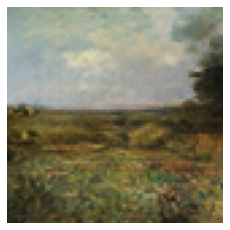

In [ ]:
latent = generate_latent_points(100, 1)
painting = model.predict(latent)[0]

plt.figure(figsize=(3, 3))
plt.imshow((painting + 1) / 2.0)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig('painting.png')
plt.show()

### Save painting to IPFS

In [ ]:
import requests
import json

In [ ]:
response = requests.post('https://ipfs.infura.io:5001/api/v0/add', files={'painting': open('painting.png', 'rb')})
imageUri = response.json()['Hash']
f'https://ipfs.io/ipfs/{imageUri}?filename=painting.png'

'https://ipfs.io/ipfs/QmRQkYgUa9oTHm3A8fZAWk1hfgUbbZM654vZYmB1sUvjab?filename=painting.png'

### Save json to IPFS

In [ ]:
token = {
    'name': 'Meadow',                                     # give your NFT a name
    'description': 'Endless meadow, up to the horizon',   # describe what you see
    'image': f'https://ipfs.io/ipfs/{imageUri}?filename=painting.png'
}
token

{'description': 'Endless meadow, up to the horizon',
 'image': 'https://ipfs.io/ipfs/QmRQkYgUa9oTHm3A8fZAWk1hfgUbbZM654vZYmB1sUvjab?filename=painting.png',
 'name': 'Meadow'}

In [ ]:
response = requests.post('https://ipfs.infura.io:5001/api/v0/add', files={'token': json.dumps(token, indent=4)})
tokenUri = response.json()['Hash']
f'https://ipfs.io/ipfs/{tokenUri}?filename=painting.json'

'https://ipfs.io/ipfs/QmePoA1N5UsiNijaBt6MNFUVJdH8XjLYwXNk7bjYSFiEcK?filename=painting.json'

### Access the smart contract

- Get and compile the [source code](https://ipfs.io/ipfs/QmPLsEHXtqDhncEuru1EmCzW7vS8SeQEFNMJQXXLuDNhQT)
- Connect to the smart contract [0xe17C396a89F4931989581110432532247372Fc28](https://rinkeby.etherscan.io/address/0xe17c396a89f4931989581110432532247372fc28)
- Mint your painting for 10'000'000 GWei!



![remix](https://kauthentechstorage.blob.core.windows.net/notebookimages/remix_07.png)


In [ ]:
f'https://ipfs.io/ipfs/{tokenUri}?filename=painting.json'

'https://ipfs.io/ipfs/QmWsLKWWxDWWsgWVnQ4RpSGwXuZDj5z4NsVnwXAUx2ANmD?filename=painting.json'

### Sell your NFT 💰

in a Test-Marketplace, e.g. [OpenSea](https://testnets.opensea.io/account)


![remix](https://kauthentechstorage.blob.core.windows.net/notebookimages/remix_08.png)


In [ ]:
%%html
<iframe src="https://testnets.opensea.io/collection/painting-thrycez4kk" width="1000" height="600"></iframe>

## Etherscan

In [ ]:
%%html
<iframe src="https://rinkeby.etherscan.io/address/0xe17c396a89f4931989581110432532247372fc28" width="1000" height="600"></iframe>

In [ ]:
%%html
<iframe src="https://rinkeby.etherscan.io/token/0xe17c396a89f4931989581110432532247372fc28" width="1000" height="600"></iframe>

# UP NEXT
[Applications](https://colab.research.google.com/drive/1uIz4qeGZb9W0zgaAP_oEKhfCpcoFRLJo?usp=sharing)